<a href="https://colab.research.google.com/github/Nikdenof/tankdetect/blob/main/Military_aircraft_detection_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ultralytics/yolov5
!cd yolov5 & pip install -r requirements.txt 
!pip install -U kora

     |████████████████████████████████| 57 kB 5.1 MB/s 
     |████████████████████████████████| 56 kB 6.6 MB/s 


In [ ]:
import torch
import os
from tqdm.autonotebook import tqdm, trange
from matplotlib import pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip


requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...


YOLOv5 🚀 2022-1-22 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)



  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



  0%|          | 0.00/14.0M [00:00<?, ?B/s]

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
model = model.cuda()

In [ ]:
# img = 'https://images.pexels.com/photos/112460/pexels-photo-112460.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500'
img = 'https://media.istockphoto.com/photos/evening-traffic-jam-near-the-moscow-kremlin-picture-id619535174'

In [ ]:
results = model(img)
results.print()

image 1/1: 679x1024 1 person, 19 cars, 1 train, 2 trucks
Speed: 126.9ms pre-process, 191.2ms inference, 43.6ms NMS per image at shape (1, 3, 448, 640)


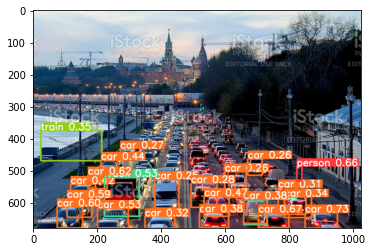

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
/content/drive/Othercomputers/Асус учеба/DLS/00. Detection project/opencvtestvid/f35.mp4

In [ ]:
# #You need to follow the authentication link to view the video
# from kora.drive import upload_public
# url = upload_public('/content/drive/Othercomputers/Асус учеба/DLS/00. Detection project/opencvtestvid/su_land.mp4')
# then display it
# from IPython.display import HTML
# url = 'https://drive.google.com/file/d/1FI2Wdq0Qkd_GY8xo_14nrF0R9hOKRRK5/view?usp=sharing'
# HTML(f"""<video src={url} width=500 controls/>""")

file_cache is unavailable when using oauth2client >= 4.0.0 or google-auth
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/googleapiclient/discovery_cache/__init__.py", line 44, in autodetect
    from . import file_cache
  File "/usr/local/lib/python3.7/dist-packages/googleapi

In [ ]:
import cv2
VIDEO_STREAM = "/content/drive/Othercomputers/Асус учеба/DLS/00. Detection project/opencvtestvid/su_land.mp4"
VIDEO_STREAM_OUT = "/content/drive/Othercomputers/Асус учеба/DLS/00. Detection project/opencvtestvid/plane_detect.avi"  

In [ ]:
cap = cv2.VideoCapture(VIDEO_STREAM)

#Setup Video writer
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
fps = cap.get(cv2.CAP_PROP_FPS)

video_writer = cv2.VideoWriter(VIDEO_STREAM_OUT,
                               cv2.VideoWriter_fourcc('P','I','M','1'),
                               fps, (width, height))
for frame_idx in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
    #Read frame
    ret, frame = cap.read()
    #Gray transform
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    results = model(frame)

    #Show image
    # cv2.imshow('Airplane detector', np.squeeze(results.render()))    
    #write a video
    video_writer.write(np.squeeze(results.render()))
    
    
    #Render
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
#closing windows
cap.release()
cv2.destroyAllWindows()

#release video writer
video_writer.release()

In [ ]:
from moviepy.editor import *

path="/content/drive/Othercomputers/Асус учеба/DLS/00. Detection project/opencvtestvid/plane_detect.avi" 

clip=VideoFileClip(path)
clip.ipython_display(width=500)

100%|██████████| 482/482 [00:01<00:00, 451.15it/s]
